In [1]:
import tensorflow as tp
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers, models

In [2]:
(train_images,train_labels), (test_images,test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images/255, test_images/255

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))
model.compile(optimizer='SGD',loss=tp.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 22s 8ms/step - loss: 2.1841 - accuracy: 0.1827 - val_loss: 1.8308 - val_accuracy: 0.3396
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7894 - accuracy: 0.3562 - val_loss: 1.6248 - val_accuracy: 0.4158
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5547 - accuracy: 0.4334 - val_loss: 1.4153 - val_accuracy: 0.4933
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4144 - accuracy: 0.4936 - val_loss: 1.3885 - val_accuracy: 0.4991
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3184 - accuracy: 0.5302 - val_loss: 1.2338 - val_accuracy: 0.5545
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2382 - accuracy: 0.5628 - val_loss: 1.1885 - val_accuracy: 0.5730
Epoch 7/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.1663 - accuracy: 0.5869 - val_loss: 1.1582 - val_accura

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

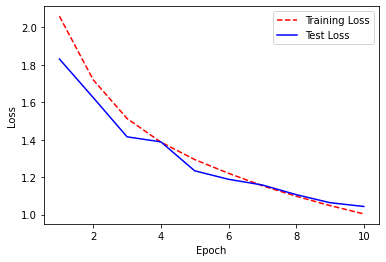

313/313 - 1s - loss: 1.0433 - accuracy: 0.6332
0.6331999897956848


In [10]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [13]:
model.evaluate(test_images, test_labels, verbose=2)
# test_loss, test_acc = 
# print(test_acc)

313/313 - 1s - loss: 1.0433 - accuracy: 0.6332


[1.0432511568069458, 0.6331999897956848]